# Feature Engineering

following the data analysis carried out in the previous module, here are the following steps for feature engineering 
- One-Hot encode the variable "Geography"
- Label-Encode the variable "Gender"
- Apply log transformation on the Age variable feature
- Create a binary feature from the column Balance and drop the column Balance
- We will also apply SMOTE technique to tackle the data imbalance
- Scale the input features using MinMax scaler


In [17]:
# importing necessary module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.transformation import LogTransformer
from sklearn.preprocessing import Binarizer, MinMaxScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.selection import DropFeatures
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, recall_score , precision_score

In [2]:
# loading up the dataset
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# split data into feature and target
X = data.drop('Exited', axis=1)
y = data['Exited']

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (10000, 13)
y shape:  (10000,)


In [4]:
# Split data into train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

print("X_train shape:", X_train.shape)
print("y_test shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape: (7500, 13)
y_test shape:  (7500,)
X_test shape:  (2500, 13)
y_test shape:  (2500,)


**Drop Unwanted Columns**

In [5]:
# drop surname, CustomerId, and RowNumber
drop_col = DropFeatures(features_to_drop=['Surname', 'CustomerId', 'RowNumber'])
drop_col.fit(X_train)
X_train = drop_col.transform(X_train)
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9414,544,Spain,Female,53,9,0.00,1,1,0,125692.07
3363,747,Germany,Male,38,2,129728.60,1,1,0,89289.54
2979,642,France,Male,40,1,154863.15,1,1,1,138052.51
578,593,France,Female,41,6,0.00,1,1,0,65170.66
7984,464,France,Male,46,6,161798.53,1,1,0,182944.47


**Label Encode the Gender Variable**

In [6]:
label_encoder = OrdinalEncoder(variables=['Gender'])
label_encoder.fit(X_train, y_train)
X_train = label_encoder.transform(X_train)
print(label_encoder.encoder_dict_)
X_train.head()

{'Gender': {'Male': 0, 'Female': 1}}


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9414,544,Spain,1,53,9,0.00,1,1,0,125692.07
3363,747,Germany,0,38,2,129728.60,1,1,0,89289.54
2979,642,France,0,40,1,154863.15,1,1,1,138052.51
578,593,France,1,41,6,0.00,1,1,0,65170.66
7984,464,France,0,46,6,161798.53,1,1,0,182944.47


**One Hot Encode the Geography variable**

In [7]:
ohe_encoder = OneHotEncoder(variables=['Geography'])
ohe_encoder.fit(X_train)
X_train = ohe_encoder.transform(X_train)
print(ohe_encoder.encoder_dict_)
X_train.head()

{'Geography': ['Spain', 'Germany', 'France']}


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Spain,Geography_Germany,Geography_France
9414,544,1,53,9,0.00,1,1,0,125692.07,1,0,0
3363,747,0,38,2,129728.60,1,1,0,89289.54,0,1,0
2979,642,0,40,1,154863.15,1,1,1,138052.51,0,0,1
578,593,1,41,6,0.00,1,1,0,65170.66,0,0,1
7984,464,0,46,6,161798.53,1,1,0,182944.47,0,0,1


**apply log transformation on the Age column**

In [8]:
log_tranformer = LogTransformer(variables=['Age'])
log_tranformer.fit(X_train)
X_train = log_tranformer.transform(X_train)
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Spain,Geography_Germany,Geography_France
9414,544,1,3.970292,9,0.00,1,1,0,125692.07,1,0,0
3363,747,0,3.637586,2,129728.60,1,1,0,89289.54,0,1,0
2979,642,0,3.688879,1,154863.15,1,1,1,138052.51,0,0,1
578,593,1,3.713572,6,0.00,1,1,0,65170.66,0,0,1
7984,464,0,3.828641,6,161798.53,1,1,0,182944.47,0,0,1


**Binarize the Balance column**

In [9]:
binarizer = SklearnTransformerWrapper(Binarizer(threshold=0), variables=['Balance'])
binarizer.fit(X_train)
X_train = binarizer.transform(X_train)

**Scale the input features**

In [10]:
# lastly we scale the input features
scaler  = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [11]:
features = scaler.get_feature_names_out()
X_train = pd.DataFrame(X_train, columns=features)


In [12]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Spain,Geography_Germany,Geography_France
0,0.388,1.0,0.661952,0.9,0.0,0.0,1.0,0.0,0.628462,1.0,0.0,0.0
1,0.794,0.0,0.458016,0.2,1.0,0.0,1.0,0.0,0.446432,0.0,1.0,0.0
2,0.584,0.0,0.489457,0.1,1.0,0.0,1.0,1.0,0.690271,0.0,0.0,1.0
3,0.486,1.0,0.504592,0.6,0.0,0.0,1.0,0.0,0.325827,0.0,0.0,1.0
4,0.228,0.0,0.575126,0.6,1.0,0.0,1.0,0.0,0.914752,0.0,0.0,1.0


C:\Users\USER\AppData\Local\Temp\ipykernel_11356\1510776863.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.hist(ax= ax)


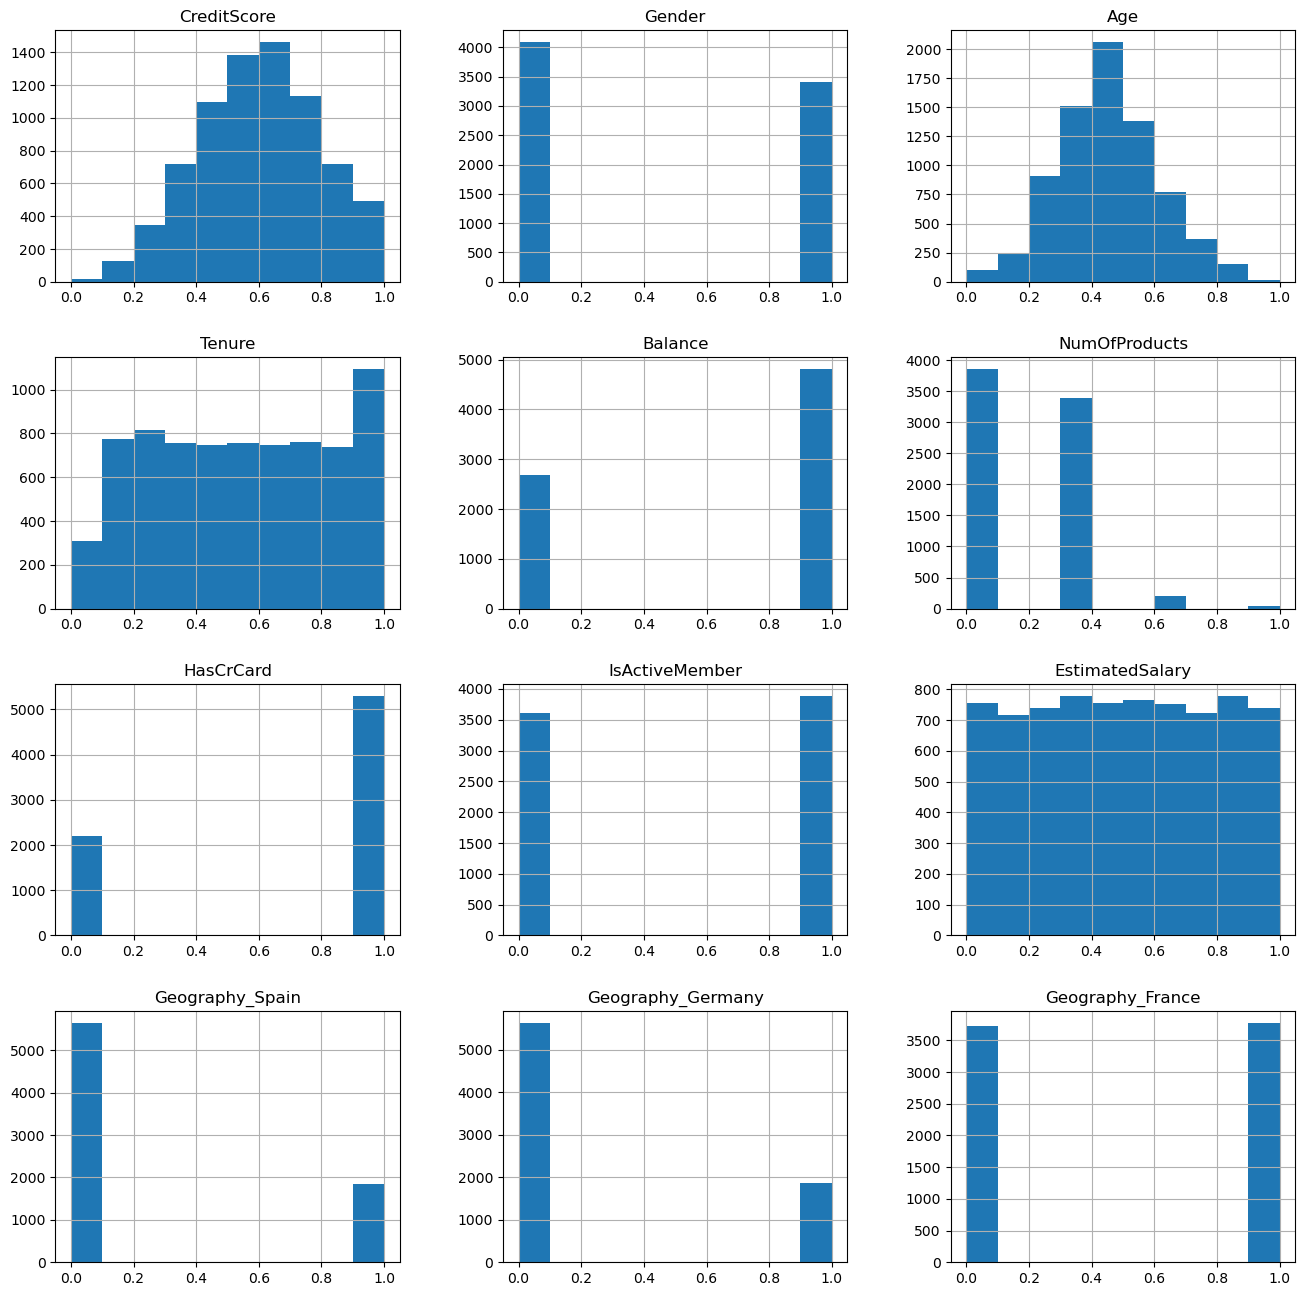

In [13]:
fig, ax = plt.subplots(figsize=(16,16))
X_train.hist(ax= ax)
plt.show()

From the above distribution graph, we can see that all features are on the same scale ranging from zero to one.

**Tackling Imbalance in the Dataset**

In [15]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

C:\Users\USER\.conda\envs\data-speaks\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [16]:
print("Distribution of churn before SMOTE: ", y_train.value_counts(normalize=True))
print("Distribution of churn after SMOTE: ", y_train_resampled.value_counts(normalize=True))


Distribution of churn before SMOTE:  Exited
0    0.796267
1    0.203733
Name: proportion, dtype: float64
Distribution of churn after SMOTE:  Exited
1    0.5
0    0.5
Name: proportion, dtype: float64


# Model Building 

I will be training up different model on both the unsampled training dataset and the resampled training dataset. The following classic machine learning models:
- Logistic Regression
- Random Forest Tree
- Gradient Boost
- SVM

we will also Use an artificial Neural network (ANN) algorithm to train our datasets

In [ ]:
# Define a list of classifiers to use
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC()
]

# Define parameters for each classifier
param_grids = [
    {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
    {'max_depth': [3,4,5], 'min_sample_split': [2,5,10], 'max_features': [2,3,4]},
    {'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
]